<a href="https://colab.research.google.com/github/abdulmoizlakhani/gen_ai_and_ds_pgd/blob/main/Assignment_01/Assignment_01_PGD_AI_DS_GEN_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/content/Churn_Modelling.csv' # Data file path

In [6]:
data = pd.read_csv(path)

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.shape

(10000, 14)

In [9]:
# We have 10,000 rows and 14 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [14]:
# We have no missing values.

In [15]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [16]:
(data[data['Exited'] == 1].shape[0] / data.shape[0]) * 100

20.369999999999997

In [17]:
# So, around 20% of the data is showing churn

In [18]:
churn = data['Exited'].value_counts().reset_index()

In [19]:
churn.head()

,Exited,count
0,0,7963
1,1,2037


<Axes: xlabel='Exited', ylabel='count'>

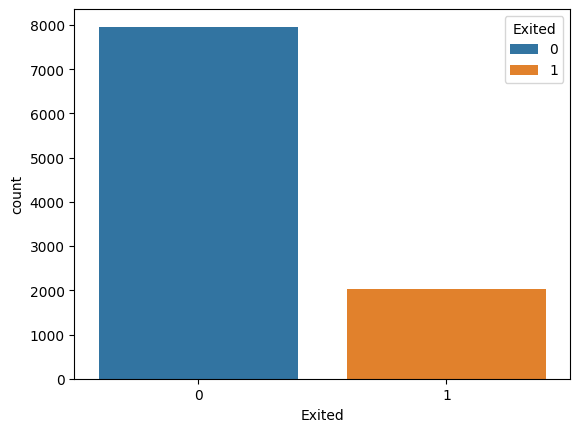

In [31]:
sns.barplot(x = churn['Exited'], y = churn['count'], hue = churn['Exited'])

In [23]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='Tenure', ylabel='Density'>

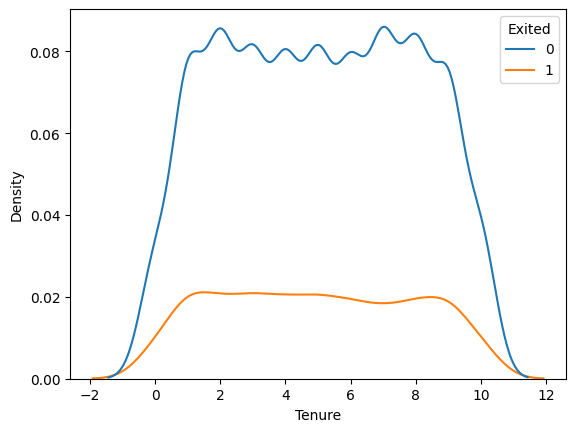

In [24]:
sns.kdeplot(x = data['Tenure'], hue = data['Exited'])

In [26]:
# Observations:
# 1. Lesser tenure, high chances to churn.
# 2. To reduce customer churn, business should work on customer retainshion strategies.

In [27]:
churning = data[data['Exited'] == 1]

In [29]:
churning.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1


In [30]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
def calculate_ratios(ax):
  l = len(ax.patches)
  cnt = 0
  without_churn = []
  with_churn = []

  for p in ax.patches:
    if cnt < 1/2:
      without_churn.append(p.get_height())
    else:
      with_churn.append(p.get_height())
    cnt += 1

  print("without_churn: ", without_churn)
  print("with_churn: ", with_churn)

  ratio = []

  for i in range(len(without_churn)):
    ratio.append(with_churn[i] / without_churn[i])

  print("ratio: ", ratio)

([0, 1, 2], [Text(0, 0, 'France'), Text(1, 0, 'Spain'), Text(2, 0, 'Germany')])

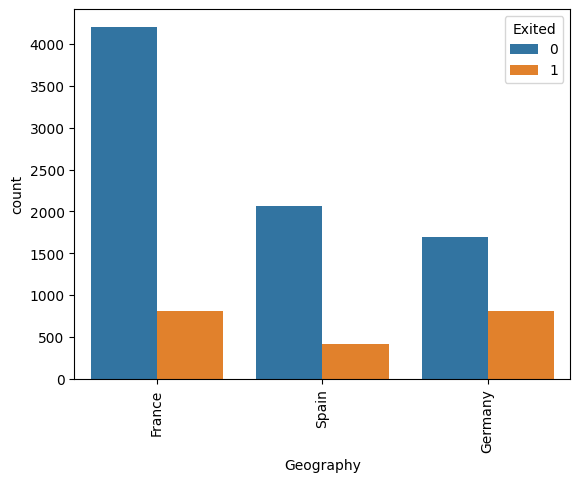

In [33]:
ax = sns.countplot(x = data['Geography'], hue = data['Exited'])
plt.xticks(rotation = 90)